In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

2016-08-23


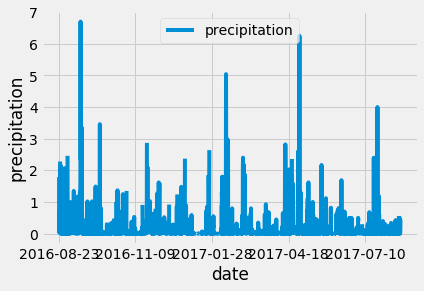

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

pastyear = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date 1 year ago from the last data point in the database
maxDate = dt.date(2017,8,23)
year_ago = maxDate - dt.timedelta(days=365)
print(year_ago)


# Perform a query to retrieve the data and precipitation scores

prcp_data = [Measurement.date, Measurement.prcp]

precip_data = session.query(*prcp_data).\
    filter(Measurement.date<=maxDate).\
    filter(Measurement.date>=year_ago).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

precip_df = pd.DataFrame(precip_data, columns=['date','precipitation'])
precip_df.head()

# Sort the dataframe by date

precip_df = precip_df.sort_values(by='date', ascending = True)

# Use Pandas Plotting with Matplotlib to plot the data


precip_df.plot(x='date',y='precipitation')
plt.xlabel('date')
plt.ylabel('precipitation')
plt.rcParams['figure.figsize'] = (10,10)
plt.savefig('Images/Precip.png')

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station).group_by(Station.station).count()
print(f"Available Stations: {stations}")

Available Stations: 9


In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(f"The Most Active Stations are") 
active_stations

The Most Active Stations are


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_station = active_stations[0][0]
active_temps = session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == most_active_station).all()

print(f"most active station temps are:")
print(f"Low:{active_temps[0][0]} High: {active_temps[0][1]} Average: {round(active_temps[0][2], 1)}")

most active station temps are:
Low:85.0 High: 54.0 Average: 71.7


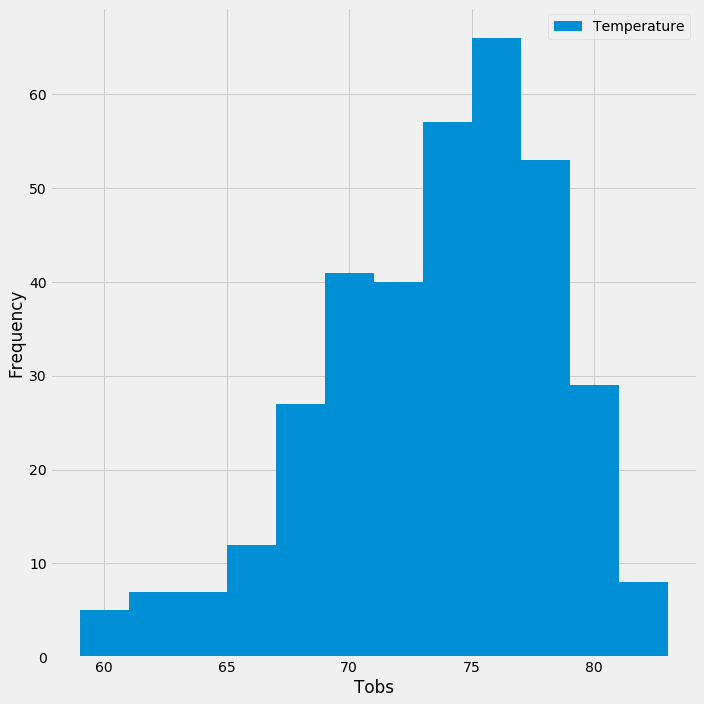

In [16]:
# Choose the station with the highest number of temperature observations.

most_observations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()
most_observations

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_year_temps = session.query(Measurement.tobs).filter(Measurement.date >= '2016-08-23').filter(Measurement.station == 'USC00519281').all()
#last_year_temps
last_year_temps=pd.DataFrame(last_year_temps, columns = ['Temperature'])

# graph
last_year_temps.plot.hist(bins=12)
plt.xlabel("Tobs")
plt.tight_layout()
plt.savefig('Images/tobs-hist.png')